In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

# plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv("../datasets/03-unloaded-res.csv")

df.time = df.time.astype(int)
df.time = df.time - 2

df.head()

,time,sent,received,latency_min,latency_median,latency_75th,latency_95th,latency_99th
0,1,4004,4047,130,224,335,1150,7794
1,2,4004,4004,128,207,318,1019,7111
2,3,4000,4000,116,226,350,494,1003
3,4,4000,3998,126,225,342,626,9862
4,5,4004,4006,123,205,314,606,3793


In [ ]:
latencia = df[['time', 'latency_median']]

latencia.columns = ['latency']

latencia = latencia.set_index('time')

latencia.head()

,latency_median
time,
1,224
2,207
3,226
4,225
5,205


In [4]:
latencia.columns

Index(['latency_median'], dtype='object')

In [5]:
latencia.columns = ['latency']

latencia.head()

,latency
time,
1,224
2,207
3,226
4,225
5,205


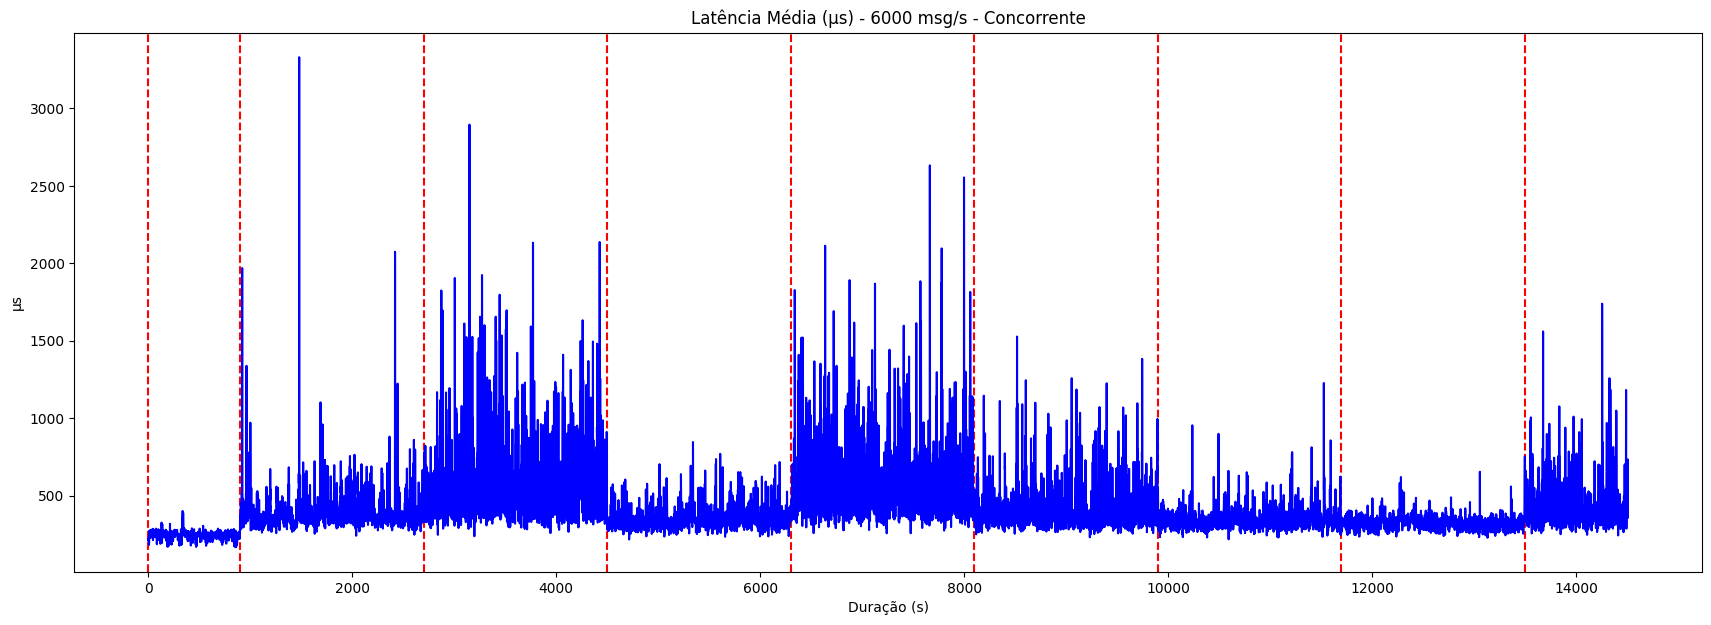

In [6]:
plt.figure(figsize=(21, 7))

assintotas = [0, 900, 2700, 4500, 6300, 8100, 9900, 11700, 13500]
for x in assintotas:
    plt.axvline(x=x, color='red', linestyle='--', label=f'Assíntota em x = {x}')

plt.plot(latencia, color='blue')
plt.title('Latência Média (µs) - 6000 msg/s - Concorrente')
plt.xlabel('Duração (s)')
plt.ylabel("µs")
# plt.grid(True)
plt.show()

In [7]:
split_time = 12000
latencia_train = latencia.loc[latencia.index <= split_time].copy()
latencia_test = latencia.loc[latencia.index > split_time].copy()

In [8]:
latencia_train.head()

,latency
time,
1,224
2,207
3,226
4,225
5,205


In [9]:
latencia_test.head()

,latency
time,
12001,296
12002,270
12003,338
12004,484
12005,437


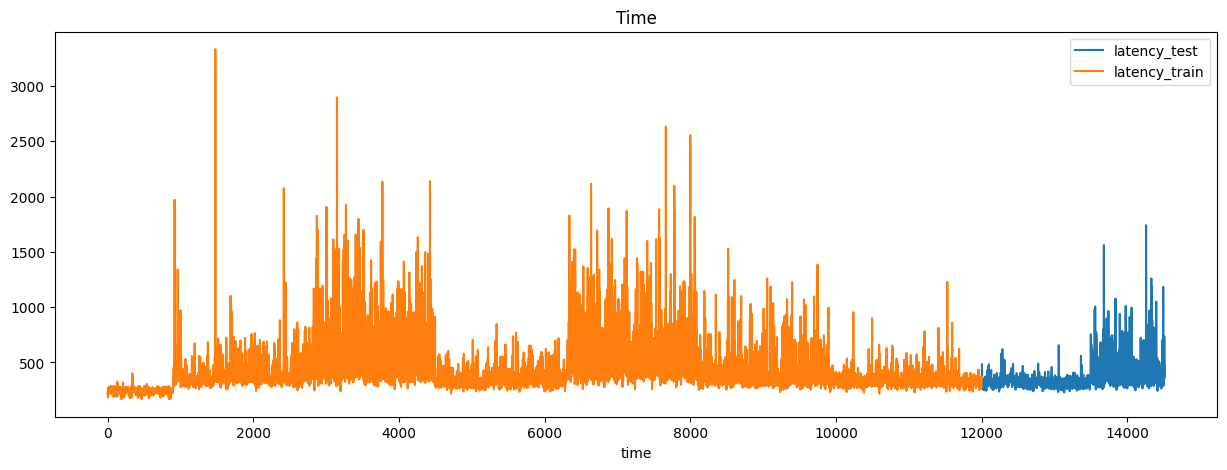

In [10]:
_ = latencia_test \
    .rename(columns={'Dataset': 'TEST SET'}) \
    .join(latencia_train.rename(columns={'Dataset': 'TRAINING SET'}), how='outer', lsuffix='_test', rsuffix='_train') \
    .plot(figsize=(15,5), title='Time')

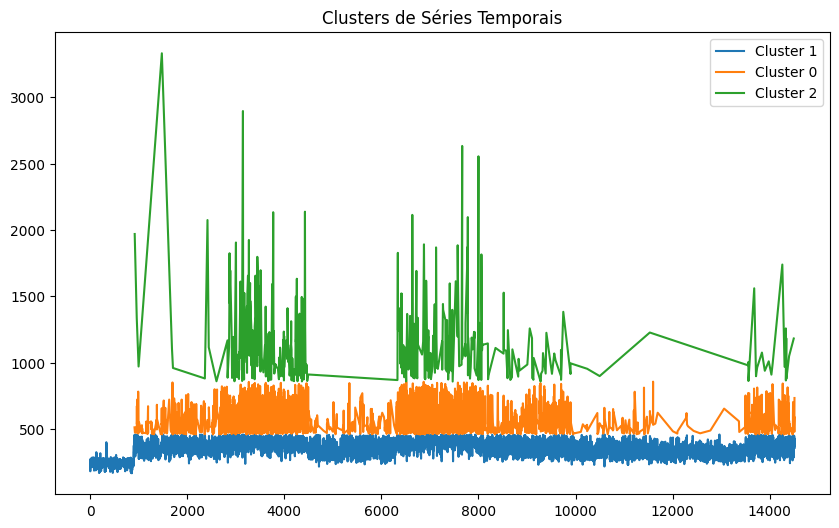

In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supondo que 'latencia' seja o seu dataset com várias séries temporais
# Exemplo simples de como fazer clustering em séries temporais

# Normalizando os dados
scaler = StandardScaler()
latencia_scaled = scaler.fit_transform(latencia)

# Aplicando K-Means para encontrar 3 clusters
kmeans = KMeans(n_clusters=3, random_state=138)
kmeans.fit(latencia_scaled)

# Visualizando os clusters
latencia['Cluster'] = kmeans.labels_

# Plotando os clusters
plt.figure(figsize=(10, 6))
for cluster in latencia['Cluster'].unique():
    cluster_data = latencia[latencia['Cluster'] == cluster]
    plt.plot(cluster_data.index, cluster_data['latency'], label=f'Cluster {cluster}')
    
plt.legend()
plt.title("Clusters de Séries Temporais")
plt.show()

/home/phil/Projects/svc-degradation-detection/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/phil/Projects/svc-degradation-detection/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/phil/Projects/svc-degradation-detection/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/home/phil/Projects/svc-degradatio

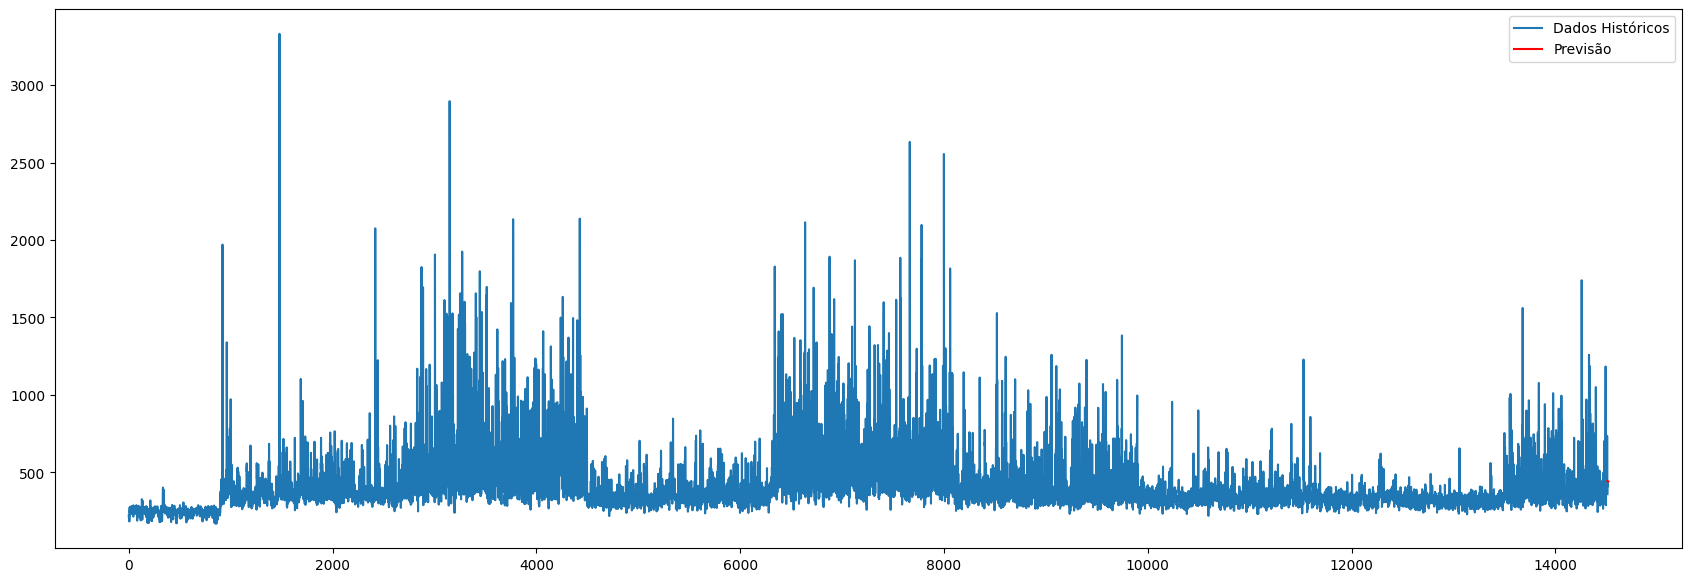

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Supondo que 'latencia' seja uma série temporal univariada (uma coluna de dados)
# Usando o ARIMA para prever os próximos valores

# Ajustando um modelo ARIMA (p, d, q) - os parâmetros p, d e q precisam ser ajustados
model = ARIMA(latencia, order=(1,0,1))  # Exemplo de (p=5, d=1, q=0)
model_fit = model.fit()

# Fazendo previsões
forecast = model_fit.forecast(steps=10)  # Prevendo os próximos 10 pontos

# Visualizando o resultado
plt.figure(figsize=(21, 7))
plt.plot(latencia, label='Dados Históricos')
plt.plot(np.arange(len(latencia), len(latencia) + 10), forecast, label='Previsão', color='red')
plt.legend()
plt.show()
